<a href="https://colab.research.google.com/github/Jigyasha17/Projects/blob/main/zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df=pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [20]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


#Conversion of datatype  of rate coloumn

In [37]:
def handle_rating(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)


In [39]:
df['rate']=df['rate'].apply(handle_rating)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
df.shape

(148, 7)

In [6]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


#Type  of Restaurant

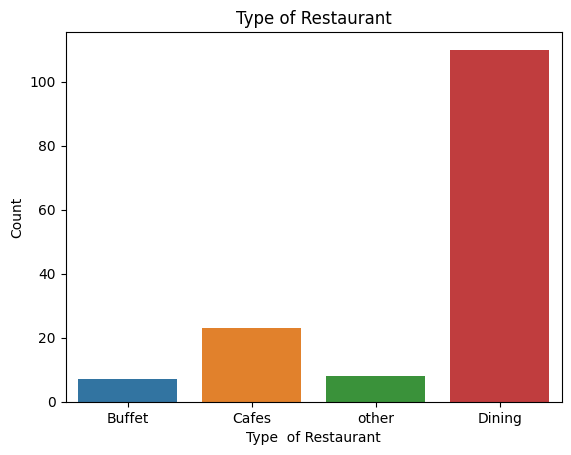

In [64]:
sns.countplot(x=df['listed_in(type)'],hue=df['listed_in(type)'])
plt.xlabel('Type  of Restaurant')
plt.ylabel('Count')
plt.title('Type of Restaurant')
plt.show()

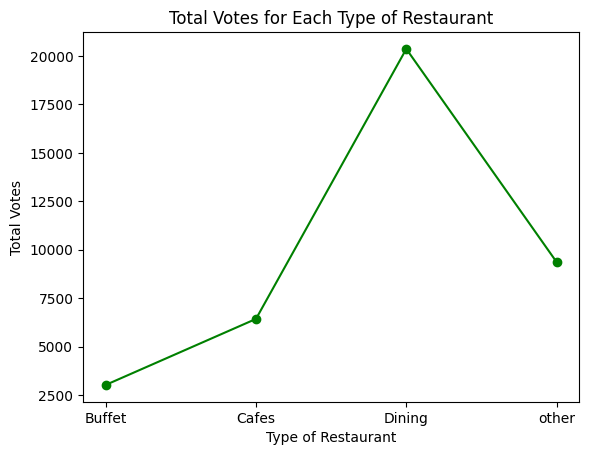

In [71]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green' ,marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Type of Restaurant')
plt.show()

#**conclusion: dinning restraunts have max votes**

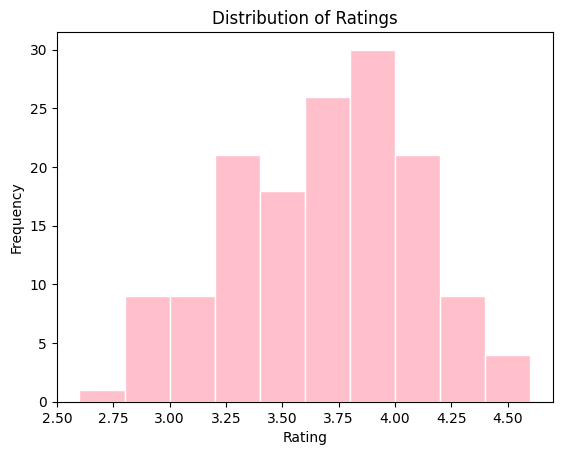

In [77]:
plt.hist(df['rate'], bins=10, edgecolor='white',color="pink")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# ***Majority Restraunts have rating in between 3.75-4***

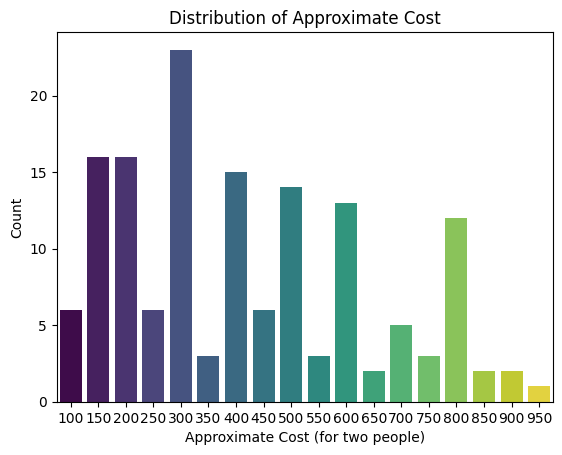

In [82]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='viridis', legend=False)
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Count')
plt.title('Distribution of Approximate Cost')
plt.show()

# ***The majority of couples prefer restraunts with avg cost 300***

# **which mode recieves max rating**

In [83]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


/tmp/ipython-input-87-128581205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order",y="rate",data=df,palette='pastel')


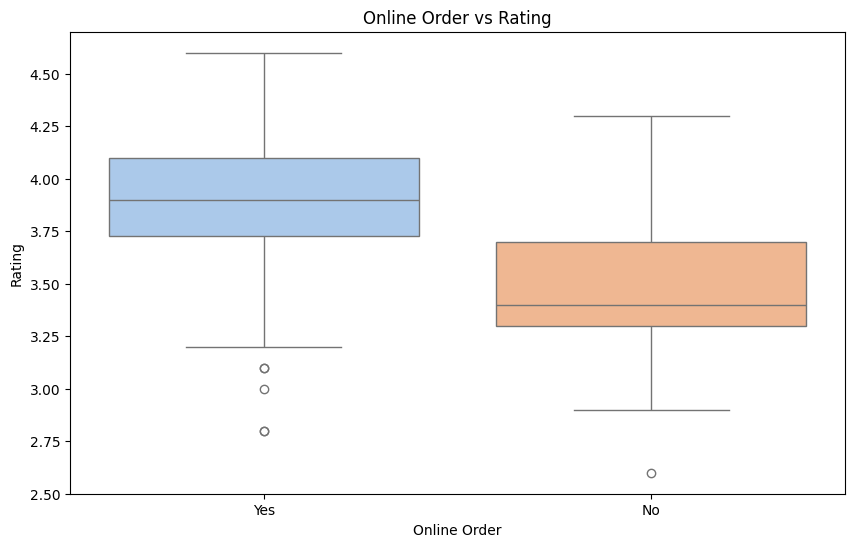

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(x="online_order",y="rate",data=df,palette='pastel')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Online Order vs Rating')
plt.show()

# **online order recieves more rating in comparison to offline order**

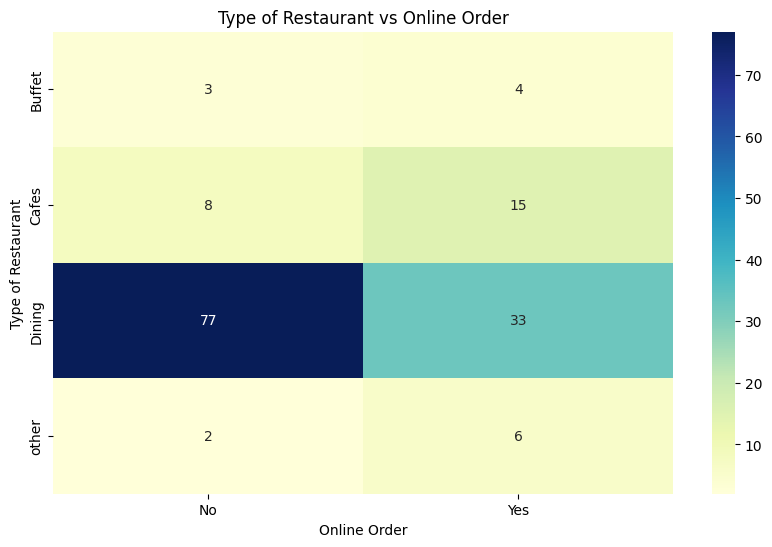

In [95]:
plt.figure(figsize=(10,6))
pivot_table=df.pivot_table(index="listed_in(type)",columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu"  , fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.title('Type of Restaurant vs Online Order')
plt.show()

# **Dinning restraunts primarily accept offline orders ,whereas cafes primarily recieve online orders . This suggest that clients prefer order in person at restraunt, but prefer online orders at cafes.**